In [1]:
'''
Udacity - ML Engineer Nanodegree Program
    Project - 1
    Titanic Survival Exploration

Talat Ozkan - 13 JAN 2018
talat.ozkan@turkcell.com.tr

Q1: Performance of the naive predictor (predictions_0)
Q2: Performance of the simple predictor (predictions_1)
Q3: Performance of the intermediate predictor (predictions_2)
Q4: Creating a complex predictor (predictions_3). A prediction accuracy of at least 80%
Q5: A scenario for performing supervised learning

'''


'\nUdacity - ML Engineer Nanodegree Program\n    Project - 1\n    Titanic Survival Exploration\n\nTalat Ozkan - 13 JAN 2018\ntalat.ozkan@turkcell.com.tr\n\nQ1: Performance of the naive predictor (predictions_0)\nQ2: Performance of the simple predictor (predictions_1)\nQ3: Performance of the intermediate predictor (predictions_2)\nQ4: Creating a complex predictor (predictions_3). A prediction accuracy of at least 80%\nQ5: A scenario for performing supervised learning\n\n'

In [2]:
# Import Libraries
import numpy as np
import pandas as pd

# display() method for DataFrames
from IPython.display import display

# Supplementary visualizations visuals.py
# https://github.com/udacity/machine-learning/projects/titanic_survival_exploration/visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline


# Load data set
# https://github.com/udacity/machine-learning/projects/titanic_survival_exploration/titanic_data.csv
data_file = '_data_titanic_survival_exploration.csv'
full_data = pd.read_csv(data_file)

# type(full_data) # pandas.core.frame.DataFrame

# Print head of the data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# I'm interested in the outcome of survivals which will be my prediction targets
# Let's store the column "Survived" in a new variable and remove it from the dataset
outcomes = full_data['Survived']

# type(outcomes) # pandas.core.series.Series

data = full_data.drop('Survived', axis = 1)

# New Data - Survived column is dropped
display(data.head())


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
'''
function accuracy_score(truth, pred):
    prints accuracy score
'''
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the function
predictions = pd.Series(np.ones(5, dtype = int))

# type(predictions) # pandas.core.series.Series

# print(np.ones(5, dtype = int)) # series of n ones

# Print predictions for first 5 passengers
# as we know from the full data, the result should be 60%
print(accuracy_score(outcomes[:5], predictions))

# Yes, it is!


Predictions have an accuracy of 60.00%.


In [5]:
'''
function predictions_0(data):
    Allways predicts that a passanger did not survive
'''
def predictions_0(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():
        
        # predict that passanger did not survive (0)
        
        predictions.append(0)
    
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_0(data)


### Question 1

* Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?


In [6]:
# Prediction accuracy from data which none of the passengers survived
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


### Answer 1

61.62%


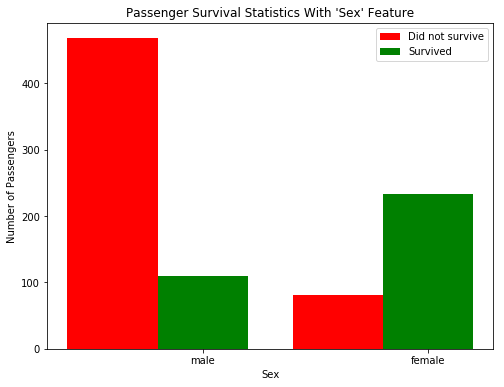

In [7]:
"""
Let's have a look whether the feature Sex has any indications
"""

# Plot the survival outcomes of passangers based on their sex
vs.survival_stats(data, outcomes, 'Sex')


In [8]:
'''
function predictions_1(data):
    Predict passengers survived if they are female
'''
def predictions_1(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():

        # predict females as survived (1)
        if passenger['Sex'].lower() == "female":
            predictions.append(1)
        else:
            predictions.append(0)
        
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_1(data)

### Question 2

* How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

In [9]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


### Answer 2

78.68%


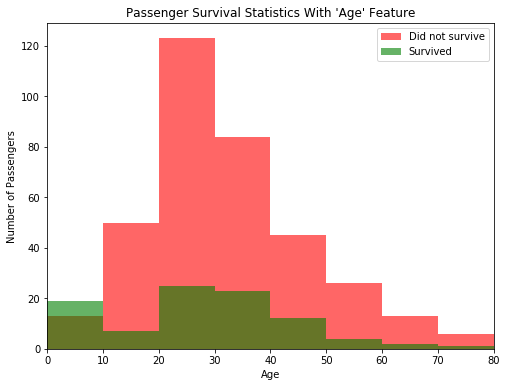

In [10]:
"""
Let's find a subset of passengers who had higher rate of survival
Let's look at age of each male
"""

vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [18]:
'''
function predictions_2(data):
    Predict passengers survived if they are female and male younger than 10
'''
def predictions_2(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():

        # predict females as survived (1)
        if (passenger['Sex'].lower() == "female"):
            predictions.append(1)
        elif (passenger['Sex'].lower() == "male" and passenger['Age'] < 10):
            predictions.append(1)
        else:
            predictions.append(0)
        
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_2(data)

### Question 3

* How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?

In [20]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


### Answer 3

79.35%

In [13]:
"""
Let's find a better precision
"""

# display(full_data.head(100))

"\nLet's find a better precision\n"

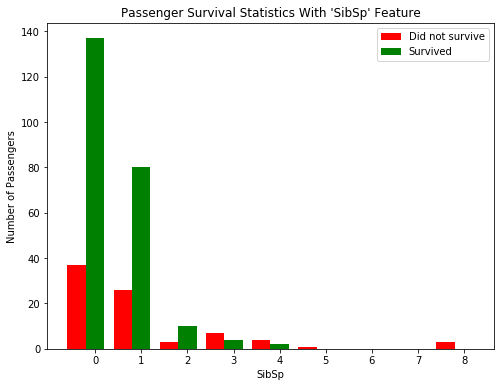

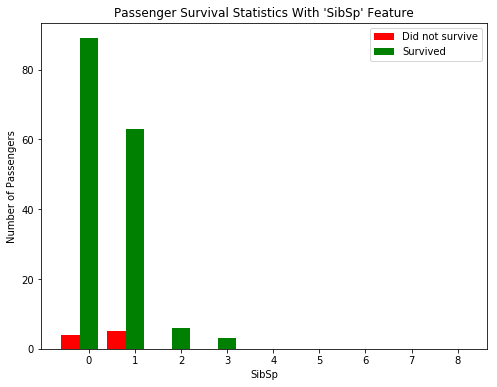

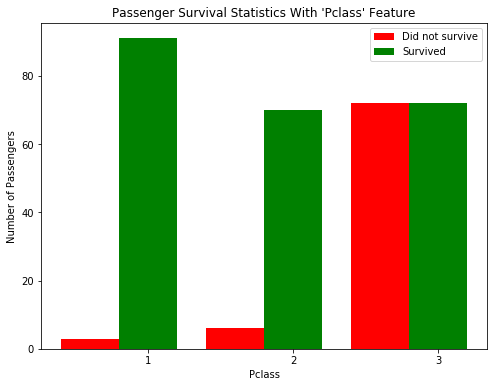

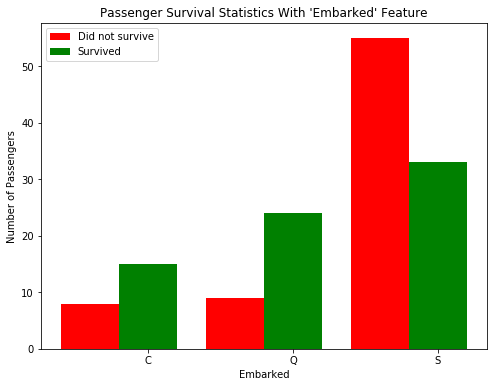

In [14]:
# vs.survival_stats(data, outcomes, 'Pclass')
# vs.survival_stats(data, outcomes, 'SibSp')
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'"]) 
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'", "Pclass < 3"]) 
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'"])
vs.survival_stats(data, outcomes, 'Embarked', ["Sex == 'female'", "Pclass >= 3"]) 


In [21]:
'''
function predictions_3(data):
    DecisionTree Model: Predict passengers survived 
'''
def predictions_3(data):
    
    predictions = []
    
    for _, passenger in data.iterrows():

        # predict females as survived (1)
        if (passenger['Sex'].lower() == "female"):
            if passenger['SibSp'] < 2 and passenger['Pclass'] < 3: 
                predictions.append(1)
            else:
                if passenger['Embarked'] in ['C', 'Q']: 
                    predictions.append(1)
                else:
                    predictions.append(0)
        else: # male
            if passenger['Age'] < 10:
                predictions.append(1)
            else:
                predictions.append(0)
        
    # return predictions
    return pd.Series(predictions)


# Make predictions
predictions = predictions_3(data)

In [22]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 81.03%.


### Question 4

* Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?

### Answer 4

* I started by listing first 100 rows of the data so I can be more familiar with the data and the columns. I skipped data with descriptions like name, ticket and cabin and focused on numeric data. First I checked the statistiscs for Pclass, SibSp and Embarked individualy. 
* Unfortunately, using only these attributes in my function did not help me to increase the accuracy over 80%. Then I decided to split the data by filtering out some columns and checked again. Visualizing the data helped me to decide which attributes to use in my precisions_3 function. As you can see in the second and the third graph, female passengers with SibSp value of 0 and 1, and from Pclass value of 1 and 2 have more survivals. For other females, I compared the Embarked values.

* <b>As a result, my final accuracy is 81.03%</b>


### Question 5

* Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.

### Answer 5

* An example would be classifying the cars which are likely to violate traffic laws. The outcome variable would be "ViolatedLaw" with attributes 1 and 0 (1 for Yes, 0 for No). Make of the car, Price of the car, sex of the driver would be helpful features for making predictions.